# Computations Using Exact Numerical Values
Till now, I have taken all physical constants in atomic units. Now, I am going to consider the exact values to verify the obtained results with the original values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import scipy.constants as const

In [2]:
hcut = const.hbar # INPUT
mass = const.electron_mass  # INPUT

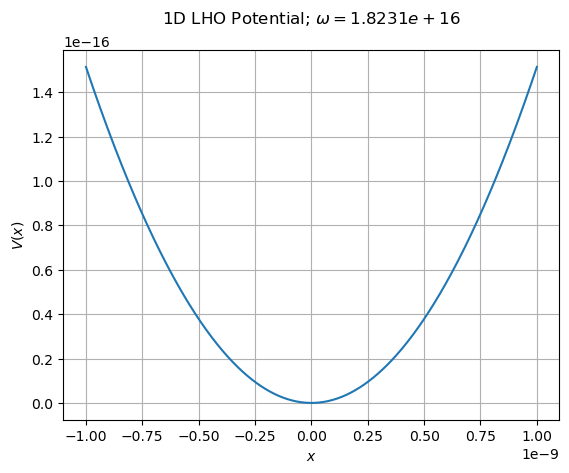

In [3]:
L = 10    # INPUT
L = 10e-10  # INPUT
x_min, x_max = -L, L
Nx = 500    # no. of grid points
x = np.linspace(x_min, x_max, Nx)   # x axis

# potential
def potential1d(x, omega):
    return 0.5*mass*(omega**2)* x**2

omega1 = 1.0 # INPUT
omega1 = 12*const.electron_volt/const.hbar  # INPUT

Vx = potential1d(x=x, omega=omega1)

plt.plot(x, Vx)
plt.title(f'1D LHO Potential; $\omega={omega1:.5}$\n')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

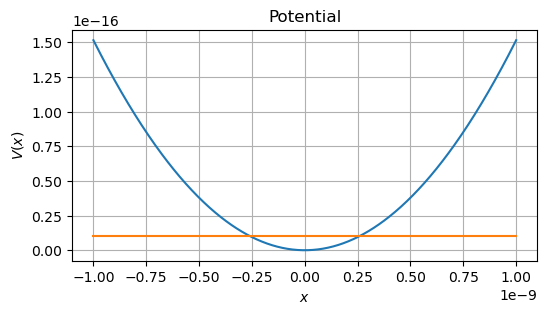

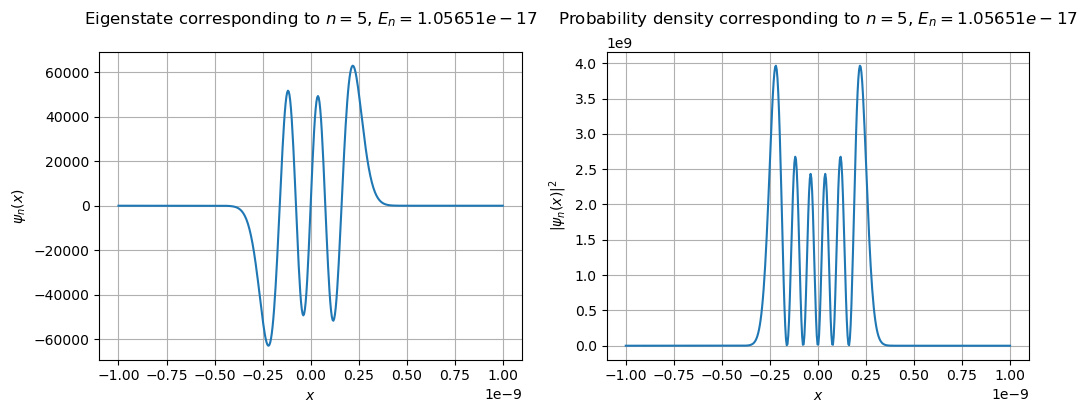

In [4]:
dx = x[1] - x[0]
D_mat = (np.diag(-2*np.ones(Nx)) + np.diag(np.ones(Nx-1), 1)
                        + np.diag(np.ones(Nx-1), -1))/dx**2
T_mat = (-hcut**2/(2*mass)) * D_mat
V_mat = np.diag(Vx*np.ones(Nx))
H_mat = T_mat + V_mat
eigenvals1, eigenvecsT1 = eigh(H_mat)

def eig_val(n):
    return eigenvals1[n]
def eig_vec(n):
    eigf = eigenvecsT1[:, n]
    eigf = eigf/np.sum(np.abs(eigf)**2*dx)**0.5
    return eigf
def prob_den(n):
    eigf = eigenvecsT1[:, n]
    eigfm2 = eigf.conjugate()*eigf
    eigf = eigf/np.sum(np.abs(eigf)**2*dx)**0.5
    eigfm2 = eigf.conjugate()*eigf
    return eigfm2

n = 5   # INPUT

plt.figure(figsize=(6,3))
plt.plot(x, Vx)
plt.plot(x, eig_val(n)*np.ones(Nx))
plt.title('Potential')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, eig_vec(n))
plt.title(f'Eigenstate corresponding to $n={n}$, $E_n={eig_val(n):.6}$\n')
plt.xlabel('$x$')
plt.ylabel(f'$\psi_n(x)$')
plt.grid()
plt.subplot(122)
plt.plot(x, prob_den(n))
plt.title(f'Probability density corresponding to $n={n}$, $E_n={eig_val(n):.6}$\n')
plt.xlabel('$x$')
plt.ylabel(f'$|\psi_n(x)|^2$')
plt.grid()
plt.show()

**Verification with exact value:**

In [5]:
(5 + 1/2)*hcut*omega1   # Exact Value of energy

1.05743657844e-17

# Different Eigenstates in a Single Plot

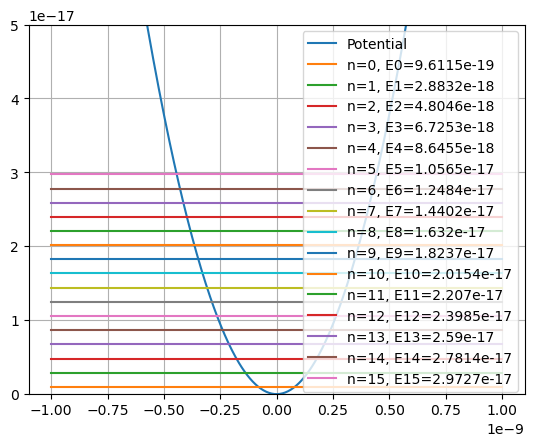

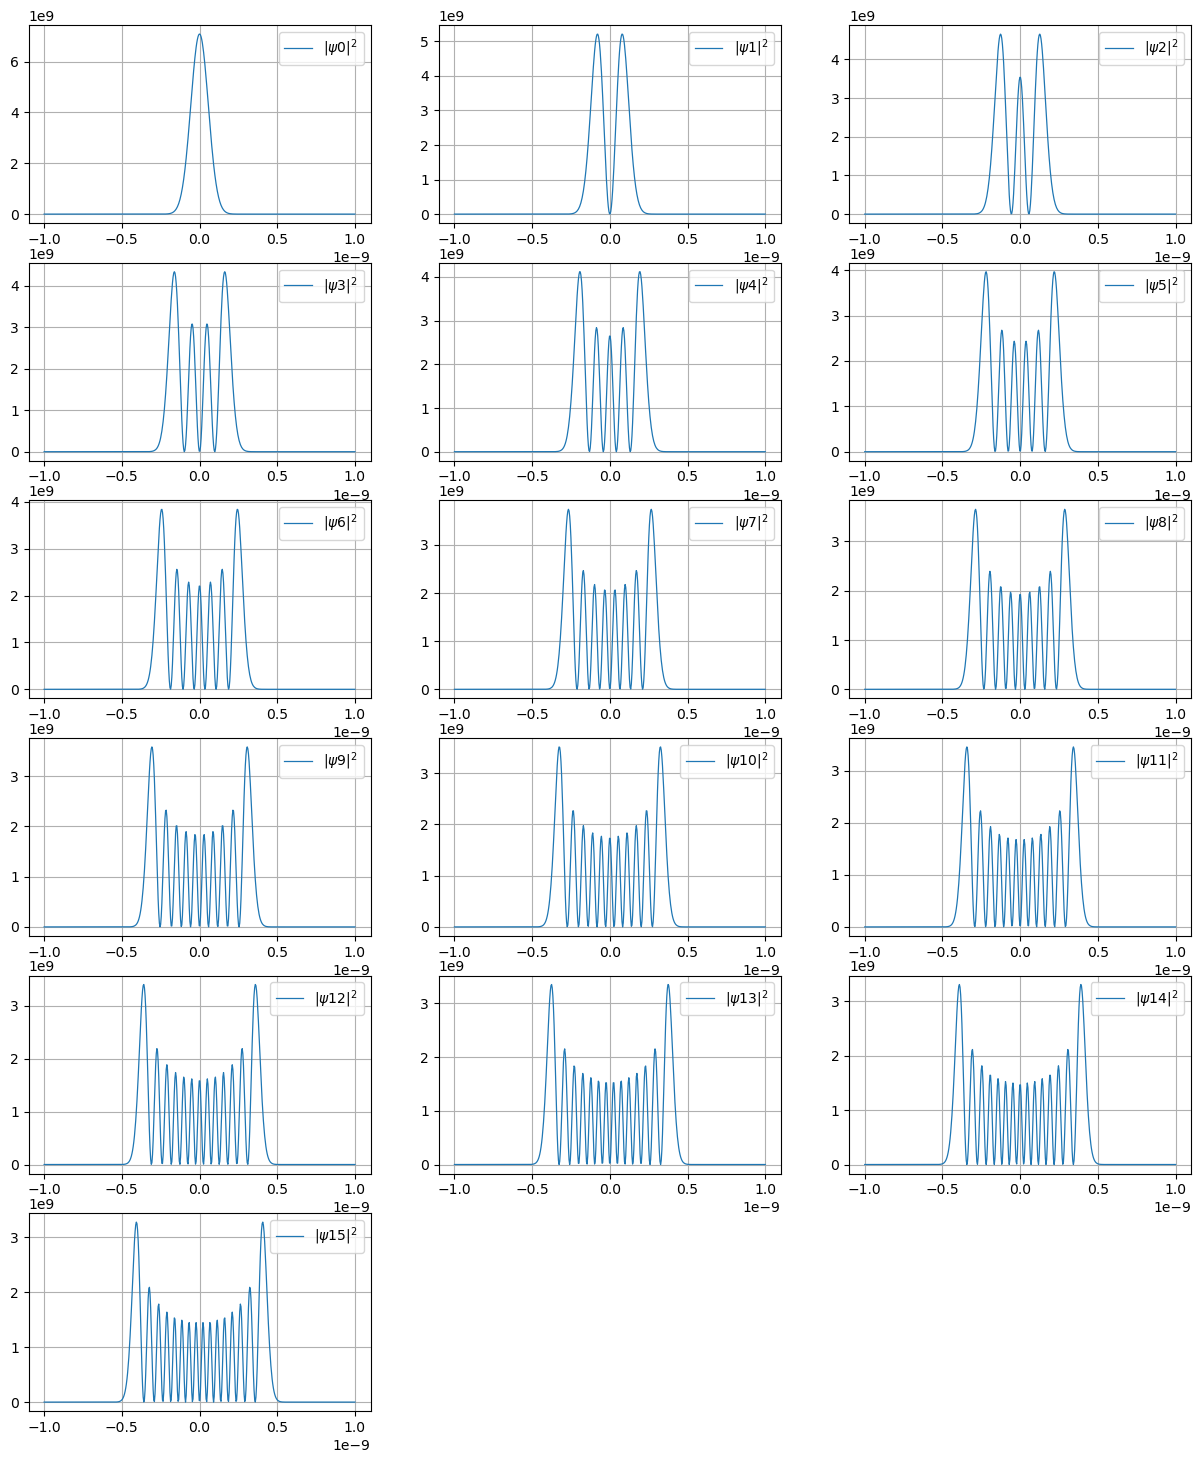

In [6]:
nmin, nmax = 0, 15  # INPUT

plt.plot(x, Vx, label='Potential')
for i in range(nmin, nmax+1):
    plt.plot(x, eig_val(i)*np.ones(Nx), label=f'n={i}, E{i}={eig_val(i):.5}')
plt.legend(loc='best')
plt.ylim(0, 0.5e-16)
plt.grid()
plt.show()

plt.figure(figsize=(15, 18)) # INPUT
for i in range(nmin, nmax+1):
    plt.subplot((nmax+1-nmin)//3 +1, 3, i-nmin+1)
    # plt.plot(x, eig_vec(i), label=f'$\psi {i}$', lw=0.7) # for wavefunction
    plt.plot(x, prob_den(i), label=f'$|\psi {i}|^2$', lw=0.9) # probability density
    plt.legend(loc='best')
    plt.grid()
plt.show()

# Momentum space

If we have a known wavefunction in position space, we get that in momentum space by using *Fourier Transformations*.

$$ \psi(x) = \frac{1}{\sqrt{2\pi\hbar}} \int a(p) \exp(\frac{ipx}{\hbar}) \,dp $$
So, by Fourier transform,
$$ a(p) = \frac{1}{\sqrt{2\pi\hbar}} \int \psi(x) \exp(-\frac{ipx}{\hbar}) \,dx $$


In [7]:
k = np.linspace(100/x_min, 100/x_max, Nx*2) # INPUT - same kind of limit that of 1/x
p = hcut*k
dp = p[1]-p[0]

def eig_vec_pspace(p, psi):
    ap = []
    for pi in p:
        api = (1/np.sqrt(2*np.pi*hcut))*np.sum(psi*np.exp(-1j*pi*x/hcut)*dx)
        ap.append(api)
    return np.array(ap)

def prob_den_pspace(p, psi):
    return np.abs(eig_vec_pspace(p, psi))**2

def eig_vec_return(p, psi):
    psix = []
    for xi in x:
        psixi = (1/np.sqrt(2*np.pi*hcut))*np.sum(eig_vec_pspace(p, psi)*np.exp(1j*p*xi/hcut)*dp)
        psix.append(psixi)
    return np.array(psix)

def prob_den_return(p, psi):
    return np.abs(eig_vec_return(p, psi))**2

Momentum distribution for $\phi_2$ state:

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


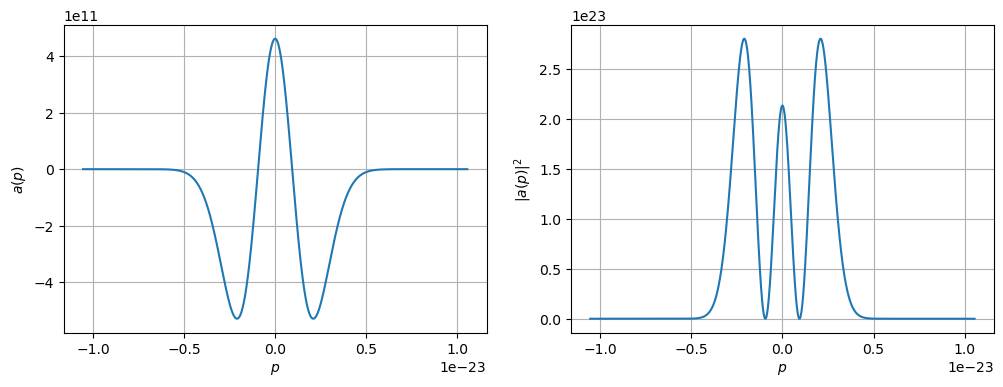

In [8]:
psi = eig_vec(2) # INPUT

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(p, eig_vec_pspace(p, psi))
plt.xlabel('$p$')
plt.ylabel('$a(p)$')
plt.grid()
plt.subplot(122)
plt.plot(p, prob_den_pspace(p, psi))
plt.xlabel('$p$')
plt.ylabel('$|a(p)|^2$')
plt.grid()
plt.show()

# Expectation values and Uncertainty

In [9]:
psi = eig_vec(2) # INPUT

def expectation_val_x(psi):
    return np.sum(x*np.abs(psi)**2*dx)
def expectation_val_x2(psi):
    return np.sum(x**2*np.abs(psi)**2*dx)
def uncertainty_x(psi):
    return np.sqrt(expectation_val_x2(psi)-(expectation_val_x(psi)**2))
def expectation_val_p(psi):
    return np.sum(p*prob_den_pspace(p, psi)*dp)
def expectation_val_p2(psi):
    return np.sum(p**2*prob_den_pspace(p, psi)*dp)
def uncertainty_p(psi):
    return np.sqrt(expectation_val_p2(psi)-(expectation_val_p(psi)**2))
def uncertainty_xp(psi):
    return uncertainty_x(psi)*uncertainty_p(psi)

print(uncertainty_xp(psi))

2.6364295538588518e-34


**Verification with exact value:**

In [10]:
(2 + 1/2)*hcut  # exact value of uncertainty (for n=2 state of LHO)

2.636429544115391e-34